# Pivot Table

The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
df.groupby('sex')[['total_bill']].mean()

,total_bill
sex,
Male,20.744076
Female,18.056897


In [13]:
df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()

total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [19]:
df.pivot_table(index='sex',columns='smoker')['total_bill']

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [20]:
df.pivot_table(index='sex',columns='smoker',values=['total_bill'])

total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [21]:
#aggfunc
df.pivot_table(index='sex',columns='smoker',aggfunc='sum')['total_bill']

smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [22]:
#multidimensional analysis
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [23]:
df.pivot_table(index=['sex','smoker'],columns=['day','time'])['total_bill']

day                 Thur               Fri                Sat        Sun
time               Lunch Dinner      Lunch  Dinner     Dinner     Dinner
sex    smoker                                                           
Male   Yes     19.171000    NaN  11.386667  25.892  21.837778  26.141333
       No      18.486500    NaN        NaN  17.475  19.929063  20.403256
Female Yes     19.218571    NaN  13.260000  12.200  20.266667  16.540000
       No      15.899167  18.78  15.980000  22.750  19.003846  20.824286

In [26]:
df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'max'})

size                                               tip  \
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  5.00   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  6.70   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  5.00   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  5.17   

                                                total_bill                \
day                    Fri           Sat    Sun       Thur           Fri   
time          Dinner Lunch Dinner Dinner Dinner      Lunch Dinner  Lunch   
sex    smoker                                                              
Male   Yes       NaN  2.20   4.73  10.00    6.5      32.68    NaN  13.42   
       No        NaN   NaN   3.50   9.00    6.0      41.19    NaN    NaN   
Female Yes       NaN  3.48   4.30   6.50    4.0      43.11    NaN  16.27   
       No        3.0  3.00   3.25   4.67    5.2      34.83  18.78  15.98   

                                    
day                     Sat    Sun  
time          Dinner Dinner Dinner  
sex    smoker                       
Male   Yes     40.17  50.81  45.35  
       No      22.49  48.33  48.17  
Female Yes     16.32  44.30  20.90  
       No      22.75  35.83  35.26

In [27]:
df.pivot_table(index='sex',columns='smoker',margins=True)['total_bill']

smoker,Yes,No,All
sex,,,
Male,22.284500,19.791237,20.744076
Female,17.977879,18.105185,18.056897
All,20.756344,19.188278,19.785943


In [28]:
#plotting graphs
expense=pd.read_csv("E:\Datasets\session 22\expense_data.csv")

In [29]:
expense

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0
...,...,...,...,...,...,...,...,...,...,...,...
272,11/22/2021 14:16,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0
273,11/22/2021 14:16,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0
274,11/21/2021 17:07,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0
275,11/21/2021 15:50,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0


In [32]:
expense['Category'].value_counts()

Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: Category, dtype: int64

In [33]:
expense.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [36]:
expense['Date']=pd.to_datetime(expense["Date"])

In [38]:
expense.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [39]:
expense['Month']=expense['Date'].dt.month_name()

In [41]:
expense.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,Month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


In [48]:
expense.pivot_table(index='Month',columns='Category',aggfunc='sum',fill_value=0)['INR']

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
Month,,,,,,,,,,,,,
December,11000,2590,196,0,6440.72,0,4800,1790,0,0,400,513.72,914.0
February,0,798,0,0,5579.85,0,2808,20000,0,0,0,1800.00,5078.8
January,1000,0,0,1400,9112.51,0,4580,13178,0,8000,0,200.00,2850.0
March,0,0,0,0,195.00,0,0,900,0,0,0,0.00,30.0
November,2000,0,0,0,3174.40,115,0,2000,3,0,0,0.00,331.0


<AxesSubplot:xlabel='Month'>

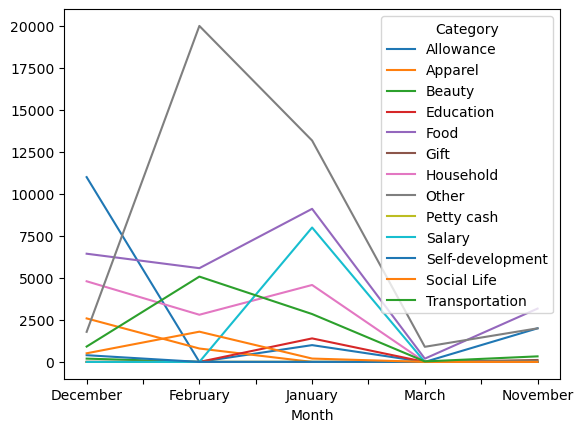

In [50]:
expense.pivot_table(index='Month',columns='Category',aggfunc='sum',fill_value=0)['INR'].plot()

In [53]:
expense.pivot_table(index='Month',columns='Income/Expense',aggfunc='sum',fill_value=0)['INR']

Income/Expense,Expense,Income
Month,,
December,16334.44,12310
February,17864.65,18200
January,20679.51,19641
March,525.00,600
November,3620.40,4003


<AxesSubplot:xlabel='Month'>

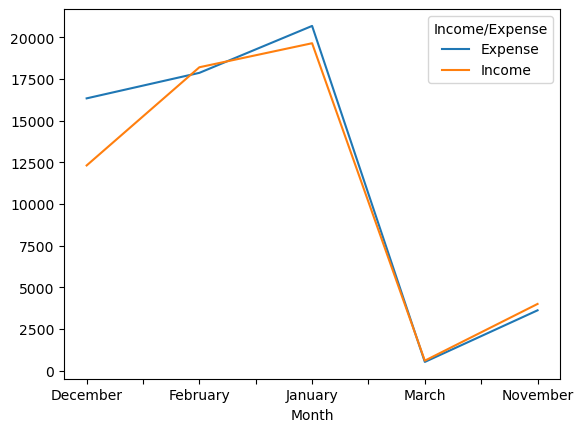

In [54]:
expense.pivot_table(index='Month',columns='Income/Expense',aggfunc='sum',fill_value=0)['INR'].plot()

In [55]:
expense.pivot_table(index='Month',columns='Account',aggfunc='sum',fill_value=0)['INR']

Account,CUB - online payment,Cash
Month,,
December,27523.72,1120.72
February,36064.65,0.00
January,40320.51,0.00
March,1125.00,0.00
November,7623.40,0.00


<AxesSubplot:xlabel='Month'>

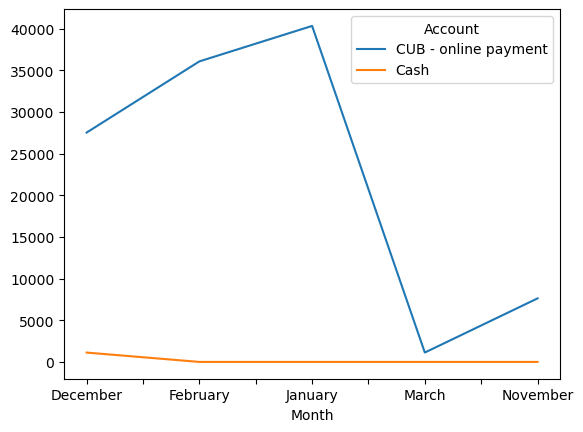

In [56]:
expense.pivot_table(index='Month',columns='Account',aggfunc='sum',fill_value=0)['INR'].plot()